In [1]:
!pip install graphviz

In [2]:

# 라이브러리 로드
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer # 사용할 dataset (유방암데이터)
from sklearn.model_selection import train_test_split # 학습, 테스트set 구분
from sklearn.tree import export_graphviz # tree 시각화를 위해
# export_graphviz : 의사결정나무에 대한 graphviz dot data 생성하는 함수
import graphviz # tree 시각화
import sklearn.metrics as mt # 성능지표를 계산하기 위해 import
from sklearn.model_selection import cross_val_score, cross_validate # 교차검증

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("turkiye-student-evaluation_generic.csv")
df

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,3,13,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5816,3,13,1,3,4,4,4,4,4,4,...,5,5,5,5,4,5,5,5,5,5
5817,3,13,1,0,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
5818,3,13,1,1,2,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [4]:
#  2.1 (데이터 수집 및 전처리)
#           - 아래 data repository에서 원하는 dataset 선택 (단, 변수가 15개 이상, 그리고 실제 label이 있는 데이터 선정)
#               https://archive.ics.uci.edu/ml/datasets.php
#           - 데이터에 대해서 이해한대로 설명
#           - 변수의 타입을 변환 처리 하지 않고 그대로 둘 것
#           - 해당 데이터에 각 3~5% 씩 결측치(0이 아닌 NaN 의미)와 이상치(극단값) 생성할 것
# ▶ 대부분 학생이 sklearn decision tree를 사용할텐데, decision tree 알고리즘 b상 결측치가 포함되어도 모델 구축이 가능하나, 
# sklearn 구현체가 NaN 값을 받아들이지 못하네요. 결측치 부분은 생성하지 말고 진행하세요.

In [5]:
input_y = pd.DataFrame(df['instr'])
input_x = df.drop(['instr'], axis=1)

In [6]:
input_y

,instr
0,1
1,1
2,1
3,1
4,1
...,...
5815,3
5816,3
5817,3
5818,3


In [7]:
input_x

,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,2,1,0,4,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,2,1,1,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,2,1,2,4,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,2,1,1,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,2,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,13,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5816,13,1,3,4,4,4,4,4,4,4,...,5,5,5,5,4,5,5,5,5,5
5817,13,1,0,4,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
5818,13,1,1,2,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [8]:
# 학습, 테스트 데이터 분리 (0.7:0.3)
seed = 2022
x_train, x_test, y_train, y_test = train_test_split(input_x, input_y, test_size=0.7, random_state=seed)

In [9]:
dt_clf = DecisionTreeClassifier(random_state=seed)
dt_clf.fit(x_train, y_train) # 학습

DecisionTreeClassifier(random_state=2022)

In [10]:
feature_names = input_x.columns.tolist()
feature_names = feature_names[2:]
feature_names

['attendance',
 'difficulty',
 'Q1',
 'Q2',
 'Q3',
 'Q4',
 'Q5',
 'Q6',
 'Q7',
 'Q8',
 'Q9',
 'Q10',
 'Q11',
 'Q12',
 'Q13',
 'Q14',
 'Q15',
 'Q16',
 'Q17',
 'Q18',
 'Q19',
 'Q20',
 'Q21',
 'Q22',
 'Q23',
 'Q24',
 'Q25',
 'Q26',
 'Q27',
 'Q28']

In [11]:
target_names = df['instr']
target_names = target_names.drop_duplicates()
target_names = ['1','2','3']
target_names

['1', '2', '3']

In [12]:
# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성
export_graphviz(dt_clf, out_file="tree.dot", class_names = target_names, 
                feature_names = None, impurity=True, filled=True)

[ max_depth의 제약이 없는 경우의 Decision Tree 시각화 ]


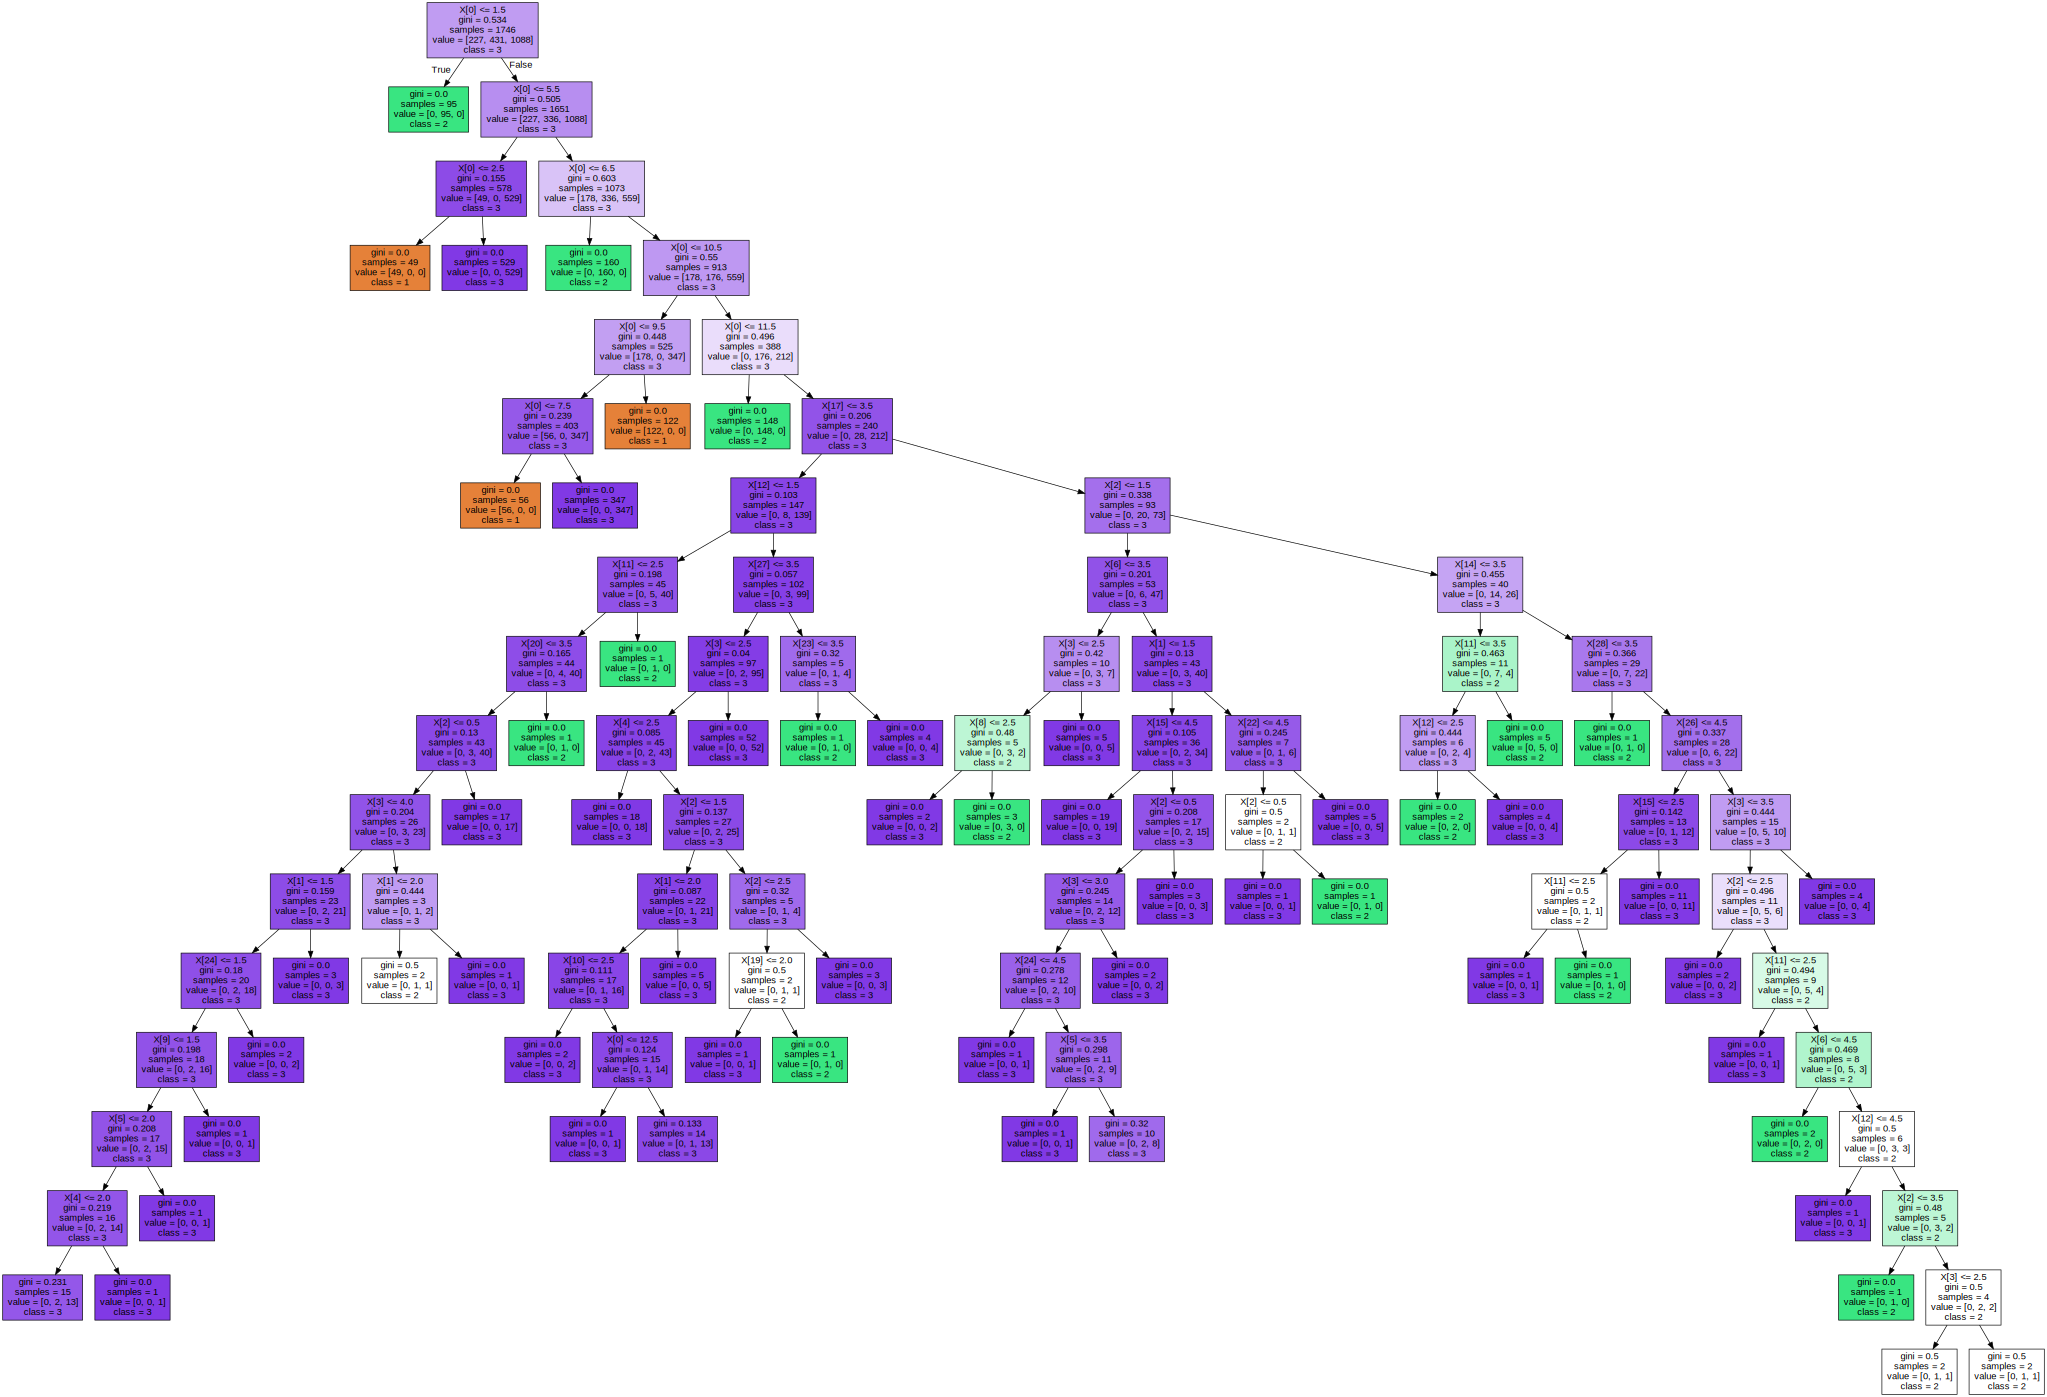

In [13]:
print('[ max_depth의 제약이 없는 경우의 Decision Tree 시각화 ]')
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [14]:
y_pred = dt_clf.predict(x_test) 

In [15]:
# 학습결과 평가
print("Train_Accuracy : ", dt_clf.score(x_train, y_train), '\n')
print("Test_Accuracy : ", dt_clf.score(x_test, y_test), '\n')

accuracy = mt.accuracy_score(y_test, y_pred)
recall = mt.recall_score(y_test, y_pred, average = 'weighted')
precision = mt.precision_score(y_test, y_pred, average = 'weighted')
f1_score = mt.f1_score(y_test, y_pred, average = 'weighted')
matrix = mt.confusion_matrix(y_test, y_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Train_Accuracy :  0.995418098510882 

Test_Accuracy :  0.9712812960235641 

Accuracy:  0.97 

Recall:  0.97 

Precision:  0.97 

F1_score:  0.97 

Confusion Matrix: 
 [[ 548    0    0]
 [   0  955   58]
 [   0   59 2454]]


In [16]:
# 교차검증

x = input_x
y = input_y

# 각 폴드의 스코어 
scores = cross_val_score(dt_clf, x, y, cv = 5)

print('Averaged results of cross validation: ', scores.mean())

Averaged results of cross validation:  0.9517182130584192


In [17]:
pd.DataFrame(cross_validate(dt_clf, x, y, cv =5))

,fit_time,score_time,test_score
0,0.009999,0.001084,0.879725
1,0.010266,0.001024,1.000000
2,0.009555,0.000762,1.000000
3,0.009309,0.000751,0.963918
4,0.006580,0.000725,0.914948


In [18]:
# test set에 대한 스코어(정확도)
dt_clf.score(x_test, y_test)

0.9712812960235641

In [19]:
pruned_dt_clf = DecisionTreeClassifier(max_depth=2, random_state=156) # max_depth=3으로 제한
pruned_dt_clf .fit(x_train, y_train)

print("Accuracy of training set: {:.3f}".format(pruned_dt_clf.score(x_train, y_train)))
print("Accuracy of test set: {:.3f}".format(pruned_dt_clf.score(x_test, y_test)))

Accuracy of training set: 0.678
Accuracy of test set: 0.668


In [20]:
# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(pruned_dt_clf, out_file="prunedtree.dot", class_names = target_names, 
                feature_names = None, impurity=True, filled=True)


[ max_depth가 2인 경우의 Decision Tree 시각화 ]


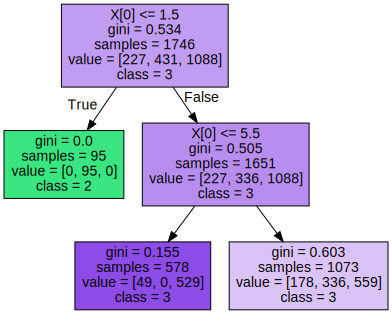

In [21]:
print('[ max_depth가 2인 경우의 Decision Tree 시각화 ]')
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("prunedtree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)